In [1]:
pip install cbio_py

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [3]:
from cbio_py import cbio_mod as cb
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [4]:
studies = cb.getAllStudies()

In [5]:
studies

[{'allSampleCount': 104,
  'cancerType': None,
  'cancerTypeId': 'prad',
  'citation': 'Hieronymus et al. PNAS 2014',
  'cnaSampleCount': None,
  'completeSampleCount': None,
  'description': 'Genome-wide copy number profiling in 104 primary prostate cancer tumor/normal pairs. <a href="http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE54691">Raw data via GEO (GSE54691)</a>.',
  'groups': 'PUBLIC',
  'importDate': '2021-04-23 00:00:00',
  'massSpectrometrySampleCount': None,
  'methylationHm27SampleCount': None,
  'miRnaSampleCount': None,
  'mrnaMicroarraySampleCount': None,
  'mrnaRnaSeqSampleCount': None,
  'mrnaRnaSeqV2SampleCount': None,
  'name': 'Prostate Adenocarcinoma (MSKCC, PNAS 2014)',
  'pmid': '25024180',
  'publicStudy': True,
  'readPermission': True,
  'referenceGenome': 'hg19',
  'rppaSampleCount': None,
  'sequencedSampleCount': None,
  'status': 0,
  'studyId': 'prad_mskcc_2014'},
 {'allSampleCount': 10194,
  'cancerType': None,
  'cancerTypeId': 'mixed',
  'citat

In [33]:
#this is a funcction that searches for a specific keyword in the study name and returns the studies from a list of studies that have that name
def return_study_list_match(studies, keyword):
    study_list = []
    for study in studies:
        if keyword in study['studyId']:
            study_list.append(study)
    return study_list

#This function looks over a list of dictionaries and returns the values of of clinicalattributeId for a specific value
def clincial_attr_ID_value_finder(clinical_data_in_study, clinical_attribute_value):
    clinical_attributes = []
    for clinical_data in clinical_data_in_study:
        if clinical_data['clinicalAttributeId'] == clinical_attribute_value:
            clinical_attributes.append(clinical_data['value'])
    return clinical_attributes

#this function looks up all of the clinical data from a list of studies and then concatenates the data into a single list of clinical
#attribute dictionaries
def return_all_clinical_data_in_studies(studies):
    clinical_data_in_study = []
    for study in studies:
        clinical_data_in_study.extend(cb.getAllClinicalDataInStudy(study['studyId']))
    return clinical_data_in_study

#this function take clinical attributeID and returns the dictiories for that clinical attribute from a list of clinical attributes
def return_clinical_attribute_from_list(clinical_attributes, clinical_attribute_ID):
    clinical_attribute_list = []
    for clinical_attribute in clinical_attributes:
        if clinical_attribute['clinicalAttributeId'] == clinical_attribute_ID:
            clinical_attribute_list.append(clinical_attribute)
    return clinical_attribute_list

In [8]:
studies_pan_can = return_study_list_match(studies, 'pan_can')

In [13]:
first_study_in_pan_can = studies_pan_can[0]
first_study_in_pan_can

{'allSampleCount': 448,
 'cancerType': None,
 'cancerTypeId': 'skcm',
 'citation': 'TCGA, Cell 2018',
 'cnaSampleCount': None,
 'completeSampleCount': None,
 'description': 'Skin Cutaneous Melanoma TCGA PanCancer data. The original data is <a href="https://gdc.cancer.gov/about-data/publications/pancanatlas">here</a>. The publications are <a href="https://www.cell.com/pb-assets/consortium/pancanceratlas/pancani3/index.html">here</a>.',
 'groups': 'PUBLIC;PANCAN',
 'importDate': '2021-10-20 00:00:00',
 'massSpectrometrySampleCount': None,
 'methylationHm27SampleCount': None,
 'miRnaSampleCount': None,
 'mrnaMicroarraySampleCount': None,
 'mrnaRnaSeqSampleCount': None,
 'mrnaRnaSeqV2SampleCount': None,
 'name': 'Skin Cutaneous Melanoma (TCGA, PanCancer Atlas)',
 'pmid': '29625048,29596782,29622463,29617662,29625055,29625050,29617662,30643250,32214244,29625049,29850653',
 'publicStudy': True,
 'readPermission': True,
 'referenceGenome': 'hg19',
 'rppaSampleCount': None,
 'sequencedSampleCo

In [38]:
all_clinical_atrributes = return_all_clinical_data_in_studies(studies_pan_can)

In [41]:
all_clinical_atrributes[1]


cancer_types = return_clinical_attribute_from_list(all_clinical_atrributes, 'CANCER_TYPE_DETAILED')
cancer_types

[{'clinicalAttribute': None,
  'clinicalAttributeId': 'CANCER_TYPE_DETAILED',
  'patientId': 'TCGA-3N-A9WB',
  'sampleId': 'TCGA-3N-A9WB-06',
  'studyId': 'skcm_tcga_pan_can_atlas_2018',
  'uniquePatientKey': 'VENHQS0zTi1BOVdCOnNrY21fdGNnYV9wYW5fY2FuX2F0bGFzXzIwMTg',
  'uniqueSampleKey': 'VENHQS0zTi1BOVdCLTA2OnNrY21fdGNnYV9wYW5fY2FuX2F0bGFzXzIwMTg',
  'value': 'Cutaneous Melanoma'},
 {'clinicalAttribute': None,
  'clinicalAttributeId': 'CANCER_TYPE_DETAILED',
  'patientId': 'TCGA-3N-A9WC',
  'sampleId': 'TCGA-3N-A9WC-06',
  'studyId': 'skcm_tcga_pan_can_atlas_2018',
  'uniquePatientKey': 'VENHQS0zTi1BOVdDOnNrY21fdGNnYV9wYW5fY2FuX2F0bGFzXzIwMTg',
  'uniqueSampleKey': 'VENHQS0zTi1BOVdDLTA2OnNrY21fdGNnYV9wYW5fY2FuX2F0bGFzXzIwMTg',
  'value': 'Cutaneous Melanoma'},
 {'clinicalAttribute': None,
  'clinicalAttributeId': 'CANCER_TYPE_DETAILED',
  'patientId': 'TCGA-3N-A9WD',
  'sampleId': 'TCGA-3N-A9WD-06',
  'studyId': 'skcm_tcga_pan_can_atlas_2018',
  'uniquePatientKey': 'VENHQS0zTi1BOVdEOn

In [30]:
clinical_data_in_study = cb.getAllClinicalDataInStudy(first_study_in_pan_can['studyId'])

In [20]:
clinical_data_in_study

[{'clinicalAttribute': None,
  'clinicalAttributeId': 'ANEUPLOIDY_SCORE',
  'patientId': 'TCGA-3N-A9WB',
  'sampleId': 'TCGA-3N-A9WB-06',
  'studyId': 'skcm_tcga_pan_can_atlas_2018',
  'uniquePatientKey': 'VENHQS0zTi1BOVdCOnNrY21fdGNnYV9wYW5fY2FuX2F0bGFzXzIwMTg',
  'uniqueSampleKey': 'VENHQS0zTi1BOVdCLTA2OnNrY21fdGNnYV9wYW5fY2FuX2F0bGFzXzIwMTg',
  'value': '9'},
 {'clinicalAttribute': None,
  'clinicalAttributeId': 'CANCER_TYPE',
  'patientId': 'TCGA-3N-A9WB',
  'sampleId': 'TCGA-3N-A9WB-06',
  'studyId': 'skcm_tcga_pan_can_atlas_2018',
  'uniquePatientKey': 'VENHQS0zTi1BOVdCOnNrY21fdGNnYV9wYW5fY2FuX2F0bGFzXzIwMTg',
  'uniqueSampleKey': 'VENHQS0zTi1BOVdCLTA2OnNrY21fdGNnYV9wYW5fY2FuX2F0bGFzXzIwMTg',
  'value': 'Melanoma'},
 {'clinicalAttribute': None,
  'clinicalAttributeId': 'CANCER_TYPE_DETAILED',
  'patientId': 'TCGA-3N-A9WB',
  'sampleId': 'TCGA-3N-A9WB-06',
  'studyId': 'skcm_tcga_pan_can_atlas_2018',
  'uniquePatientKey': 'VENHQS0zTi1BOVdCOnNrY21fdGNnYV9wYW5fY2FuX2F0bGFzXzIwMTg',


In [19]:
tmb_values = clincial_attr_ID_value_finder(clinical_data_in_study,'TMB_NONSYNONYMOUS')

In [43]:
tmb_values

['1',
 '1.033333333',
 '0.666666667',
 '0.733333333',
 '0.633333333',
 '0.633333333',
 '0.866666667',
 '0.766666667',
 '0.7',
 '0.733333333',
 '0.466666667',
 '0.366666667',
 '1.4',
 '0.733333333',
 '0.633333333',
 '0.733333333',
 '1.466666667',
 '0.5',
 '1.333333333',
 '0.666666667',
 '0.966666667',
 '0.566666667',
 '0.966666667',
 '0.6',
 '0.8',
 '0.4',
 '0.5',
 '0.8',
 '0.6',
 '1.1',
 '0.933333333',
 '0.633333333',
 '0.733333333',
 '0.466666667',
 '0.533333333',
 '0.5',
 '0.6',
 '0.6',
 '0.966666667',
 '0.5',
 '1.2',
 '1.866666667',
 '22.43333333',
 '0.433333333',
 '0.5',
 '1.9',
 '0.7',
 '0.633333333',
 '0.766666667',
 '0.6',
 '0.166666667',
 '0.7',
 '1.433333333',
 '0.333333333',
 '0.4',
 '0.766666667',
 '1.566666667',
 '0.4',
 '0.633333333',
 '0.433333333',
 '0.433333333',
 '0.666666667',
 '0.666666667',
 '0.566666667',
 '0.566666667']

In [53]:
len(tmb_values)

65

In [61]:
#sort tmb_values in ascending order
tmb_values.sort()

In [62]:
x = []
for i in range(len(tmb_values)):
    x.append('cancer A')

In [110]:
tmb_values_study = {'cancer_a': tmb_values}
tmb_values_study_df = pd.DataFrame(tmb_values_study)
tmb_values_study_df
#removed the last rom tmb_values_study_df
tmb_values_study_df = tmb_values_study_df.drop(tmb_values_study_df.index[-1])
tmb_values_study_df

,cancer_a
0,0.166666667
1,0.333333333
2,0.366666667
3,0.4
4,0.4
...,...
59,1.433333333
60,1.466666667
61,1.566666667
62,1.866666667


In [111]:
tmb_values_study_df = tmb_values_study_df['cancer_a'].astype(float)
tmb_values_study_df = tmb_values_study_df.reset_index()

In [135]:
#I need to add a random number column to the tmb_values_study_df between 0.9 and 1.1 to make the plot look better
tmb_values_study_df['random_number'] = np.random.uniform(0.9, 1.1, len(tmb_values_study_df))

cancer_a
0     0.166667
1     0.333333
2     0.366667
3     0.400000
4     0.400000
        ...   
59    1.433333
60    1.466667
61    1.566667
62    1.866667
63    1.900000
Name: cancer_a, Length: 64, dtype: float64
[1.05669196]


ValueError: x and y must have same first dimension, but have shapes (1,) and (64,)

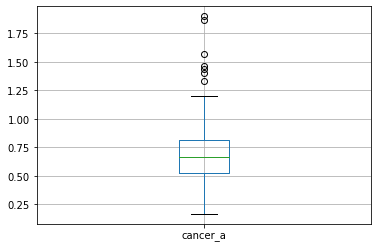

In [138]:
# This makes a boxplot of the cancer A data
bp = tmb_values_study_df.boxplot(column='cancer_a')
#for each column value in the dataframe
for x in tmb_values_study_df.columns:
    if x != 'index':
        print(x)
        y = tmb_values_study_df[x]
        print(y)
        x = np.random.normal(1,0.04,1)
        print(x)
        plt.plot(1,y, 'o')

In [101]:
bp.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

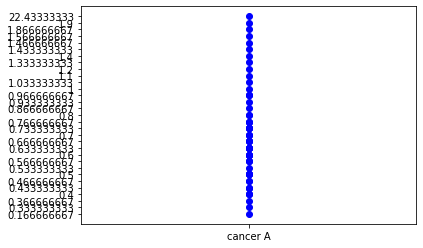

In [63]:
fig, ax = plt.subplots()
ax.plot(x,tmb_values, "bo")

In [66]:
#add a boxplot to the plot
ax.boxplot(x,tmb_values)

TypeError: cannot perform reduce with flexible type